In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
import pickle


In [2]:
data = pd.read_csv('student-mat.csv',sep = ";")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
data["G3"].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [4]:
data.shape

(395, 33)

In [5]:
data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [6]:
#Duplicate value find and remove

def removingDuplicates(data):
    duplicateCount = data.duplicated().sum()
    print("Counts of Duplicates values: ", duplicateCount)  
    if duplicateCount >= 1:
        data.drop_duplicates(inplace=True)
        print('Duplicate values removing completed')
    else:
        print('No duplicate values found')
        
removingDuplicates(data)

Counts of Duplicates values:  0
No duplicate values found


c:\Users\Udara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


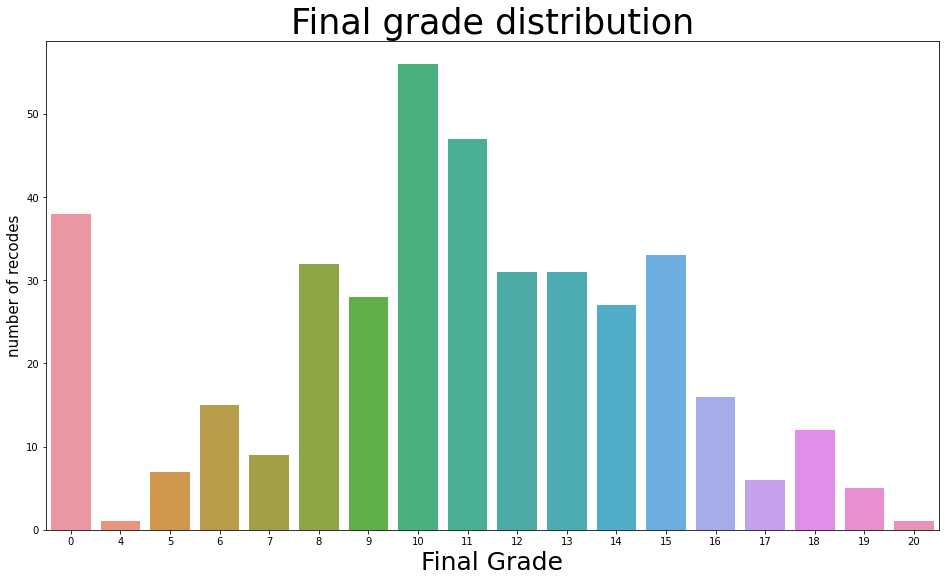

c:\Users\Udara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


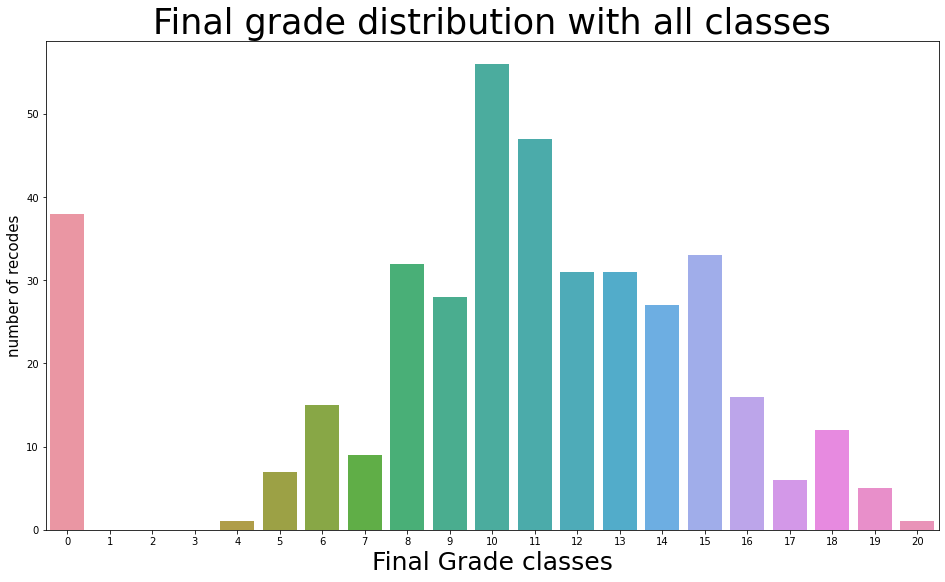

In [7]:
def dataVizual(data):
    plt.figure(figsize=(16, 9))
    dv = sns.countplot(data["G3"] )
    dv.axes.set_title("Final grade distribution",fontsize = 35)
    dv.set_xlabel("Final Grade",fontsize = 25)
    dv.set_ylabel('number of recodes' ,fontsize = 15)
    plt.show()
    
def classesVizualization(data):
    plt.figure(figsize=(16, 9))
    cv = sns.countplot(data["G3"],order=[i for i in range(21)])
    cv.axes.set_title("Final grade distribution with all classes",fontsize = 35)
    cv.set_xlabel("Final Grade classes",fontsize = 25)
    cv.set_ylabel('number of recodes' ,fontsize = 15)
    plt.show()
    
dataVizual(data)
classesVizualization(data)
    
    
    



In [8]:
def Add_average_marks_to_data(data):
    data["GradeAvarage"] = (data["G1"] + data["G2"] + data["G3"]) /3
 
Add_average_marks_to_data(data)   
data.columns
data




,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GradeAvarage
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,9.000000
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,15.333333
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,8.333333
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,11.000000


In [9]:
def gradeAllocation(data):
    All_Students_grades = []
    
    for aveMark in data["GradeAvarage"]:
        if aveMark >= (0.90 * data["GradeAvarage"].max()):
            All_Students_grades.append("A+")
        elif aveMark >= (0.80 * data["GradeAvarage"].max()):
            All_Students_grades.append("A")
        elif aveMark >= (0.75 * data["GradeAvarage"].max()):
            All_Students_grades.append("A-")
        elif aveMark >= (0.70 * data["GradeAvarage"].max()):
            All_Students_grades.append("B+")
        elif aveMark >= (0.65 * data["GradeAvarage"].max()):
            All_Students_grades.append("B")
        elif aveMark >= (0.60 * data["GradeAvarage"].max()):
            All_Students_grades.append("B-")
        elif aveMark >= (0.55 * data["GradeAvarage"].max()):
            All_Students_grades.append("C+")
        elif aveMark >= (0.45 * data["GradeAvarage"].max()):
            All_Students_grades.append("C")
        elif aveMark < (0.45 * data["GradeAvarage"].max()):
            All_Students_grades.append("F")
            
    data["StudentLevel"] = All_Students_grades
    return data
    
    

In [10]:
PreprosesData = gradeAllocation(data)

In [11]:
encoding = PreprosesData.drop("StudentLevel", axis=1)

object_cols = encoding.select_dtypes(include=[np.object])
print(object_cols.columns)


label_encoder = preprocessing.LabelEncoder()

# loop through every non numeric object
for col in object_cols:
    PreprosesData[col] = label_encoder.fit_transform(list(encoding[col]))

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


C:\Users\Udara\AppData\Local\Temp/ipykernel_19112/1236844298.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  object_cols = encoding.select_dtypes(include=[np.object])


In [12]:
PreprosesData.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,GradeAvarage,StudentLevel
0,0,0,18,1,0,0,4,4,0,4,...,4,1,1,3,6,5,6,6,5.666667,F
1,0,0,17,1,0,1,1,1,0,2,...,3,1,1,3,4,5,5,6,5.333333,F
2,0,0,15,1,1,1,1,1,0,2,...,2,2,3,3,10,7,8,10,8.333333,F
3,0,0,15,1,0,1,4,2,1,3,...,2,1,1,5,2,15,14,15,14.666667,A-
4,0,0,16,1,0,1,3,3,2,2,...,2,1,2,5,4,6,10,10,8.666667,F


In [13]:
def read_in_and_split_data(data,label):
    X = data.drop(label, axis=1)
    y = data[label]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

In [14]:
def classification_metrics(model, conf_matrix):
    print(f"Training Accuracy Score: {model.score(X_train, y_train) * 100:.1f}%")
    print(f"Validation Accuracy Score: {model.score(X_test, y_test) * 100:.1f}%")
    fig,ax = plt.subplots(figsize=(8,6))
    sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = 'YlGnBu',fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title('Confusion Matrix', fontsize=20, y=1.1)
    plt.ylabel('Actual label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()
    print(classification_report(y_test, y_pred))

Training Accuracy Score: 100.0%
Validation Accuracy Score: 91.1%


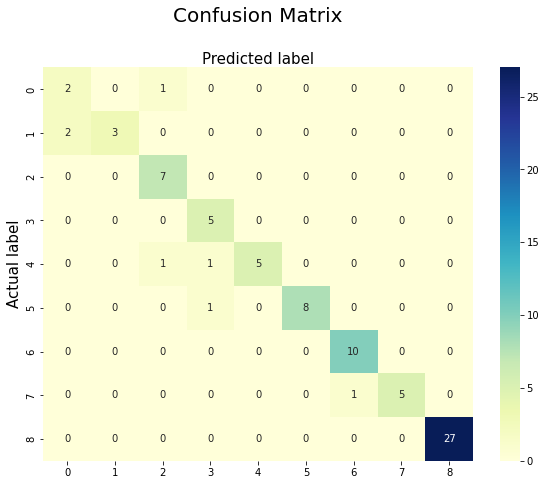

              precision    recall  f1-score   support

           A       0.50      0.67      0.57         3
          A+       1.00      0.60      0.75         5
          A-       0.78      1.00      0.88         7
           B       0.71      1.00      0.83         5
          B+       1.00      0.71      0.83         7
          B-       1.00      0.89      0.94         9
           C       0.91      1.00      0.95        10
          C+       1.00      0.83      0.91         6
           F       1.00      1.00      1.00        27

    accuracy                           0.91        79
   macro avg       0.88      0.86      0.85        79
weighted avg       0.93      0.91      0.91        79



In [15]:
lable ='StudentLevel'
X_train, X_test, y_train, y_test = read_in_and_split_data(PreprosesData, lable)

# Train model

#Machinelearning_Algorithmn=RandomForestClassifier()
#model = Machinelearning_Algorithmn.fit(X_train, y_train)
#prediction = model.predict(X_test) # make predictions based on test data
#error = abs(prediction - y_test)

#print(f"Training Accuracy Score: {model.score(X_train, y_train) * 100:.1f}%")
#print(f"Validation Accuracy Score: {model.score(X_test, y_test) * 100:.1f}%")

#y_pred = model.predict(X_test)
#conf_matrix = confusion_matrix(y_test,y_pred)

pipeline = make_pipeline(StandardScaler(),  RandomForestClassifier())
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test,y_pred)
classification_metrics(pipeline, conf_matrix)


In [16]:
pickle.dump(model, open("student_perfomence.pkl", 'wb'))